In [1]:
import pandas as pd, re
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
import calendar
import matplotlib.dates as mdates
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
import math
import holidays
from operator import itemgetter
from astral import Astral

ModuleNotFoundError: No module named 'astral'

In [3]:
a = Astral()

In [4]:
city = a['Belfast']

In [5]:
timezone = city.timezone

In [6]:
sun = city.sun(date=datetime(2009, 4, 22), local=True)

In [7]:
print('Sunrise:    %s' % str(sun['sunrise']))
print('Sunset:    %s' % str(sun['sunset']))
print('Length of day     %s' % str(sun['sunset']-sun['sunrise']))

Sunrise:    2009-04-22 06:05:04+01:00
Sunset:    2009-04-22 20:39:32+01:00
Length of day     14:34:28


In [8]:
df = pd.read_csv('demandForecastingData.csv', parse_dates=['Date'])

In [9]:
def calc_length_day(date):
    sun = city.sun(date=date, local=True)
    return (sun['sunset'] - sun['sunrise']).total_seconds()

In [10]:
df['Length of day'] = df.apply(lambda row: calc_length_day(row['Date']), axis=1)

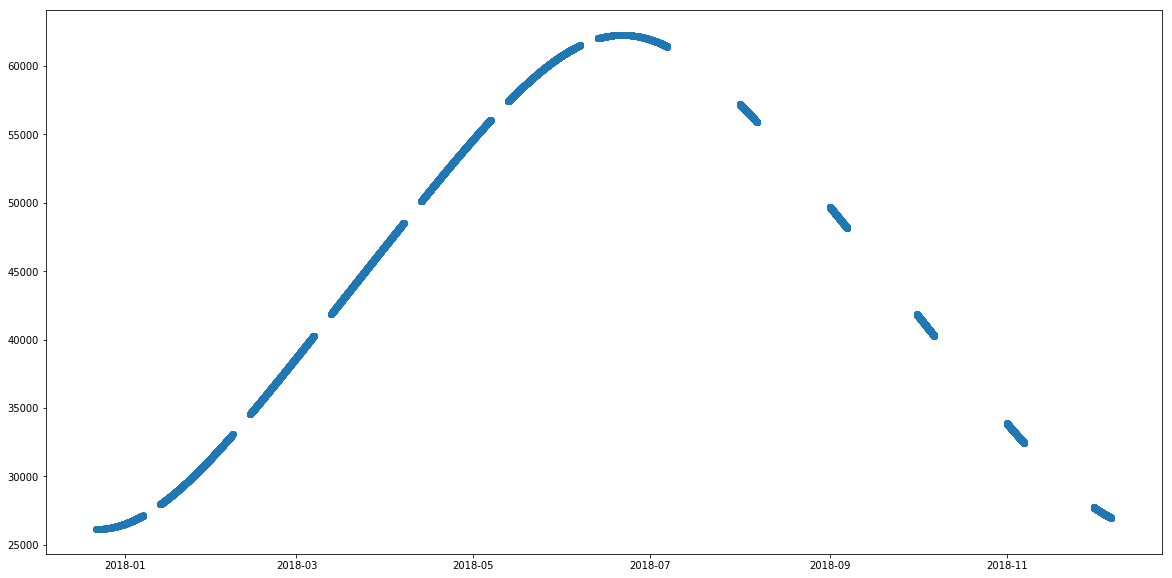

In [11]:
plt.figure(figsize=(20,10))
ranged_df = df[(df['Date'] >= datetime(2017, 12, 22)) & (df['Date'] < datetime(2018, 12, 21))]
plt.plot_date(ranged_df['Date'], ranged_df['Length of day'])

In [52]:
ranged_df['Load'].corr(ranged_df['Length of day'])

-0.19633017778007927